<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

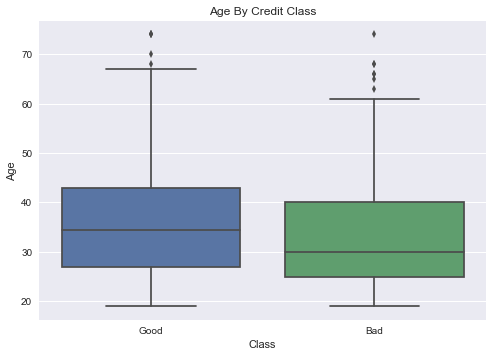

In [3]:
# Put the command (or commands) here that would give an answer to the above question.
sns.boxplot(x = credit_train['Class'], y = credit_train['Age'])
plt.title("Age By Credit Class")
plt.show()

# Comment whether age is a good predictor
# 

COMMENT HERE!

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [48]:
# Command:
print("Normalized Cross Tab")
pd.crosstab(credit_train['CreditHistory.Critical'],
            credit_train['Class'],
            margins = True,
            normalize = 'index')

# One sentence summary:
# 

Normalized Cross Tab


Class,Bad,Good
CreditHistory.Critical,,
0,0.358003,0.641997
1,0.167401,0.832599
All,0.304455,0.695545


In [46]:
print("Cross Tab")
pd.crosstab(credit_train['CreditHistory.Critical'],
            credit_train['Class'],
            margins = True)

Cross Tab


Class,Bad,Good,All
CreditHistory.Critical,,,
0,208,373,581
1,38,189,227
All,246,562,808


Based on the cross tabulation table I don't see any strong evidence that having a critical credit history (`CreditHistory.Critical = 1`) is correlated to ones credit worthiness.  Only 38 of the 277 (16%) people with critical histories have a *bad* credit score.  Of the 581 people without a critical credit history 208 (35.8%) of them have a *bad* credit score.  Based on these observations I would argue that this variable is not sufficent to distinguish between the levels in our response variable. 

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [5]:
# Define a function for assigning biary response
def binary_assignment(x):
    if x == 'Good':
        return 1
    else:
        return 0

# Apply function to data
credit_train.loc[:, 'binary_response'] = credit_train['Class'].apply(binary_assignment)
credit_test.loc[:, 'binary_response'] = credit_test['Class'].apply(binary_assignment)

<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [6]:
#Define a list with the names of the variables we will use in the model. 
features = ['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
            'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
            'ForeignWorker', 'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200',
            'CheckingAccountStatus.gt.200', 'CreditHistory.ThisBank.AllPaid',
            'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'CreditHistory.Critical']

# Prepare training data
x_train = credit_train.loc[:, features]
y_train = credit_train.loc[:, 'binary_response']

# Prepare testing data
x_test = credit_test.loc[:, features]
y_test = credit_test.loc[:, 'binary_response']

In [7]:
logit_reg = LogisticRegression()
logit_model = logit_reg.fit(x_train, y_train)

In [66]:
pd.DataFrame({'features' : features,
              'coefficents' : logit_model.coef_[0]})[['features', 'coefficents']]

,features,coefficents
0,Duration,-0.023982
1,Amount,-0.000058
2,InstallmentRatePercentage,-0.180569
3,ResidenceDuration,0.064219
4,Age,0.015075
5,NumberExistingCredits,0.042108
6,NumberPeopleMaintenance,0.139480
7,Telephone,-0.280501
8,ForeignWorker,-0.268720
9,CheckingAccountStatus.lt.0,-1.850352


Using logistic regression a model for credit worthiness was developed using 16 parameters.  An intercept was also fit. with the model.  Using the table above we can study the impact of each coeffienct impacts the probablity of having good credit. 

Looking at the performance of the model using several evaluation methods incldued in the cells below, it is aparent that the model performs X well.  The overall accuracy of the model is 69.2%, however the model performs only slightly better than random chance (AUC = 0.58).  

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [11]:
predicted_y = logit_model.predict(x_test)

In [ ]:
prdicted is columns??

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [34]:
# Command that outputs acccuracy
accuracy_score(y_test, predicted_y)

0.69270833333333337

<h3>Q.7. Generate the ROC curve.</h3>

In [43]:
fpr, tpr, threshold = roc_curve(y_test, predicted_y)

0.58333333333333348

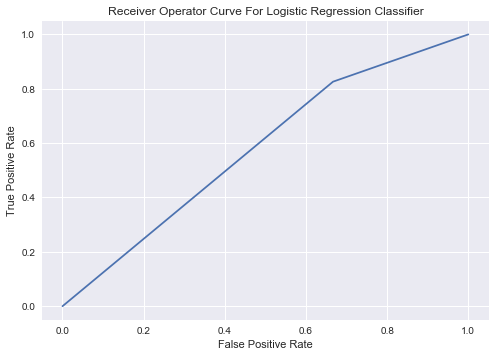

In [31]:
plt.plot(fpr, tpr)
plt.title("Receiver Operator Curve For Logistic Regression Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [13]:
# Command(s):
auc = roc_auc_score(y_test, predicted_y)
print('The area under the ROC curve is {}'.format(auc.round(2)))

The area under the ROC curve is 0.58


This indicates that the logistic model we developed does only slightly better than radom chance.  

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [17]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(x_train, y_train)

In [25]:
lda_predicted_y = lda_model.predict(x_test)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [26]:
accuracy_score(y_test, lda_predicted_y)


0.6875

In [27]:
fpr, tpr, threshold = roc_curve(y_test, lda_predicted_y)

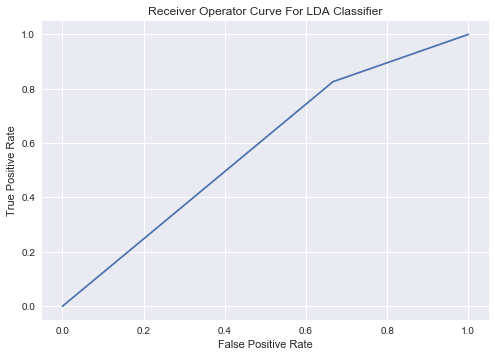

In [30]:
plt.plot(fpr, tpr)
plt.title("Receiver Operator Curve For LDA Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()